##### Custom Function definitions

In [1]:
# For drawing a line of type '=' (i.e. =============) between observations when required
def lineDistributer(ch = '=', num = 127):
    print("\n" + ch * num + "\n")

In [2]:
# To remove columns from Data
def removeCols(data, list):
    for i in list:
        data.pop(i)
    return data

In [3]:
# For Making copy and creating a dataframe
def copyDF(val, val2, str = 'Data Accuracy'):
    result = val.copy()
    result.update(val2)
    return pd.DataFrame(list(result.items()), columns = ['Model', str])

##### Custom Varibales to store data

In [4]:
# Dictionary to store classifier percentages
train_percent = dict()
test_percent = dict()
train_percent2 = dict()
test_percent2 = dict()
baseModels = dict()
boostModels = dict()
k_fold_percent = dict()

# List to store classifier Type
ModelType = list()

##### Libraries

In [5]:
# Libraries

# !pip install openpyxl

import warnings as w
# No warnings will be shown in Out[#]:
w.simplefilter("ignore")

# Data Pre-Processing
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Visualization Plots
import seaborn as sns
import matplotlib.pyplot as plt

# For balancing data
from sklearn.utils import resample

# Getting data ready for models
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Classification
from sklearn.datasets import make_classification

# Models
# 1. Naive Bayes------------------------------------
from sklearn.naive_bayes import GaussianNB
# 2. Logistic Regression----------------------------
from sklearn.linear_model import LogisticRegression
# 3. Decision Tree ---------------------------------
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# 4. Support Vector Machines(SVM)-------------------
from sklearn.svm import SVC

# Enhancement
# 1. Random Forest----------------------------------
from sklearn.ensemble import RandomForestClassifier
# 2. XG Boost
#!pip install xgboost
from xgboost import XGBClassifier
# 3. Gradient Boosting------------------------------
from sklearn.ensemble import GradientBoostingClassifier
# 4. ADA Boost
from sklearn.ensemble import AdaBoostClassifier
# 5. Bagging Classifier-----------------------------
from sklearn.ensemble import BaggingClassifier

# To prevent over fitting
from sklearn.model_selection import cross_val_score

# For checking best parameter we will use grid search cross validation
from sklearn.model_selection import GridSearchCV

# Checking Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [6]:
def modelValues(classifier = DecisionTreeClassifier(), model_name = 'model', X = [1], y = [1], model_type = 'base'):
    classifier.fit(X_train, y_train)
    baseModels[model_name] = classifier
    
    # Predicting one record to check the model
    print('Predicting one record to check the', model_name, 'model') 
    print('Desired Prediction = 0, Actual Prediction =', 
          classifier.predict(mms.transform([[3.92649072e-01, 1.76273097e-01, 9.77121582e+00, 9.69926130e+00, 2.47970886e-02, 1.94158354e-01, 9.84290505e+00, -2.70843506e-02, -3.62396240e-03, 7.62939453e-04, 1.92551386e-02, 3.04630824e-01, 2.28789223e+01, -5.85464744e+00, 2.08930556e+00, -6.46924094e+00, -5.22287342e+00, 3.49934705e+01, -5.10988653e+01, 9.12774100e-03]], )))

    if model_type.lower() == "base":
        # Checking Accuracy of train data----------------------------------------------
        train_pred = classifier.predict(X_train)
        train_percent[model_name] = round(accuracy_score(y_train, train_pred) * 100, 3)
        print("Train -> {:.3f}%".format(train_percent[model_name]))
        # Checking Accuracy on test data----------------------------------------------
        test_pred = classifier.predict(X_test)
        test_percent[model_name] = round(accuracy_score(y_test, test_pred) * 100, 3)
        print("Test -> {:.3f}%".format(test_percent[model_name]))

    elif model_type.lower() == "boost":
        # Checking Accuracy of train data----------------------------------------------
        train_pred = classifier.predict(X_train)
        train_percent2[model_name] = round(accuracy_score(y_train, train_pred) * 100, 3)
        print("Train -> {:.3f}%".format(train_percent2[model_name]))
        # Checking Accuracy on test data------------------------------------------------
        test_pred = classifier.predict(X_test)
        test_percent2[model_name] = round(accuracy_score(y_test, test_pred) * 100, 3)
        print("Test -> {:.3f}%".format(test_percent2[model_name]))
    
    # Checking Accuracy after K-Cross Validation to deal with Overfitting
    val = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    k_fold_percent[model_name] = round((val.mean()) * 100, 3)
    print("K-Fold Cross Validation -> {:.3f}%".format(k_fold_percent[model_name]))
    lineDistributer('*', 30)
    
    # Confusion Matrix
    y_pred = classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))

---

# 1. Identify a dataset from online resources available.

In [7]:
# Import Data
Data = pd.read_csv("../../Dataset/PSV1/DataGpsMpuLeft.csv")

In [8]:
Data.head()

,Unnamed: 0,timestamp,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,acc_x_above_suspension,acc_y_above_suspension,acc_z_above_suspension,acc_x_below_suspension,acc_y_below_suspension,...,mag_y_above_suspension,mag_z_above_suspension,temp_dashboard,temp_above_suspension,temp_below_suspension,timestamp_gps,latitude,longitude,speed,RoadType
0,0,1.577219e+09,0.365116,0.167893,9.793961,0.327626,0.172733,9.781861,0.024797,0.172611,...,-7.537556,-0.334800,35.065355,33.340132,31.782640,1.577219e+09,-27.717841,-51.098865,0.009128,Asphalt
1,1,1.577219e+09,0.392649,0.176273,9.771216,0.381496,0.189492,9.699261,0.024797,0.194158,...,-6.469241,-5.222873,34.993471,33.172402,31.782640,1.577219e+09,-27.717841,-51.098865,0.009128,Asphalt
2,2,1.577219e+09,0.409408,0.181062,9.732909,0.283333,0.182310,9.807000,0.003249,0.227677,...,-7.893661,-4.687194,34.993471,33.412017,31.926408,1.577219e+09,-27.717841,-51.098865,0.009128,Asphalt
3,3,1.577219e+09,0.371101,0.164302,9.749668,0.314458,0.230194,9.739963,0.005643,0.172611,...,-7.893661,-4.687194,34.969509,33.220325,31.926408,1.577219e+09,-27.717841,-51.098865,0.009128,Asphalt
4,4,1.577219e+09,0.390255,0.159514,9.869378,0.344385,0.202660,9.762708,0.005643,0.200144,...,-8.012363,-4.084555,34.945548,33.220325,31.830563,1.577219e+09,-27.717841,-51.098865,0.009128,Asphalt


### Data Details
Features - 33
Target feature - RoadType

---

# 2. Analysis of data and preparation-visualization/cleaning

In [9]:
# Dealing with Missing Values

# Finding count of missing value in each column
print(Data.isnull().sum())

# Checking Dimesnions of dataset 
#       - (rows, columns)
print(Data.shape, end = "\n\n")

Unnamed: 0                 0
timestamp                  0
acc_x_dashboard            0
acc_y_dashboard            0
acc_z_dashboard            0
acc_x_above_suspension     0
acc_y_above_suspension     0
acc_z_above_suspension     0
acc_x_below_suspension     0
acc_y_below_suspension     0
acc_z_below_suspension     0
gyro_x_dashboard           0
gyro_y_dashboard           0
gyro_z_dashboard           0
gyro_x_above_suspension    0
gyro_y_above_suspension    0
gyro_z_above_suspension    0
gyro_x_below_suspension    0
gyro_y_below_suspension    0
gyro_z_below_suspension    0
mag_x_dashboard            0
mag_y_dashboard            0
mag_z_dashboard            0
mag_x_above_suspension     0
mag_y_above_suspension     0
mag_z_above_suspension     0
temp_dashboard             0
temp_above_suspension      0
temp_below_suspension      0
timestamp_gps              0
latitude                   0
longitude                  0
speed                      0
RoadType                   0
dtype: int64
(

##### Dealing with missing values - Not Required - For now

In [10]:
# # Numerical values
# #       - Using scikit-learn's imputer method to replace missing values with mean
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imputer.fit(Data[["Duration to accept offer", "Pecent hike expected in CTC", 
#                   "Percent hike offered in CTC", "Percent difference CTC"]])
# Data[["Duration to accept offer", "Pecent hike expected in CTC", "Percent hike offered in CTC", 
#       "Percent difference CTC"]] = imputer.transform(Data[["Duration to accept offer", "Pecent hike expected in CTC", 
#                                                            "Percent hike offered in CTC", "Percent difference CTC"]])

# # Finding count of missing value in each column
# print(Data.isnull().sum())


# # Categorical values
# #       - Using scikit-learn's imputer method to replace missing values with mean
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# imputer.fit(Data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']])
# Data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']] = imputer.transform(Data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']])

# # Finding count of missing value in each column
# print(Data.isnull().sum())

##### Converting object to category type

In [11]:
# Type of columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144036 entries, 0 to 144035
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               144036 non-null  int64  
 1   timestamp                144036 non-null  float64
 2   acc_x_dashboard          144036 non-null  float64
 3   acc_y_dashboard          144036 non-null  float64
 4   acc_z_dashboard          144036 non-null  float64
 5   acc_x_above_suspension   144036 non-null  float64
 6   acc_y_above_suspension   144036 non-null  float64
 7   acc_z_above_suspension   144036 non-null  float64
 8   acc_x_below_suspension   144036 non-null  float64
 9   acc_y_below_suspension   144036 non-null  float64
 10  acc_z_below_suspension   144036 non-null  float64
 11  gyro_x_dashboard         144036 non-null  float64
 12  gyro_y_dashboard         144036 non-null  float64
 13  gyro_z_dashboard         144036 non-null  float64
 14  gyro

##### Finding unique value for Target Variable - RoadType

In [12]:
Data[~Data.duplicated('RoadType')]

,Unnamed: 0,timestamp,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,acc_x_above_suspension,acc_y_above_suspension,acc_z_above_suspension,acc_x_below_suspension,acc_y_below_suspension,...,mag_y_above_suspension,mag_z_above_suspension,temp_dashboard,temp_above_suspension,temp_below_suspension,timestamp_gps,latitude,longitude,speed,RoadType
0,0,1.577219e+09,0.365116,0.167893,9.793961,0.327626,0.172733,9.781861,0.024797,0.172611,...,-7.537556,-0.334800,35.065355,33.340132,31.782640,1.577219e+09,-27.717841,-51.098865,0.009128,Asphalt
30831,30831,1.577219e+09,1.144428,-2.191592,11.313082,0.458110,-0.952542,8.454276,0.671232,-6.555096,...,2.552086,1.205278,36.143619,33.507862,31.590949,1.577219e+09,-27.688735,-51.120601,5.651886,Dirt
35846,35846,1.577219e+09,-2.717419,-3.513192,6.845501,-0.711457,-1.563063,4.171050,0.933397,-5.274198,...,-42.910653,-4.888074,37.197921,34.226705,32.166023,1.577219e+09,-27.689419,-51.124598,2.850612,Cobblestone


In [13]:
Data['RoadType'] = Data['RoadType'].astype('category')

In [14]:
# Use below to copy and write code faster
# .map({'no':0, 'yes':1})

Data['RoadType'] = Data['RoadType'].astype('category').map({'Asphalt' : 0, 'Dirt' : 1, 'Cobblestone' : 2})

In [15]:
# Type of columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144036 entries, 0 to 144035
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Unnamed: 0               144036 non-null  int64   
 1   timestamp                144036 non-null  float64 
 2   acc_x_dashboard          144036 non-null  float64 
 3   acc_y_dashboard          144036 non-null  float64 
 4   acc_z_dashboard          144036 non-null  float64 
 5   acc_x_above_suspension   144036 non-null  float64 
 6   acc_y_above_suspension   144036 non-null  float64 
 7   acc_z_above_suspension   144036 non-null  float64 
 8   acc_x_below_suspension   144036 non-null  float64 
 9   acc_y_below_suspension   144036 non-null  float64 
 10  acc_z_below_suspension   144036 non-null  float64 
 11  gyro_x_dashboard         144036 non-null  float64 
 12  gyro_y_dashboard         144036 non-null  float64 
 13  gyro_z_dashboard         144036 non-null  fl

### Checking correlation using Heatmap

<AxesSubplot:>

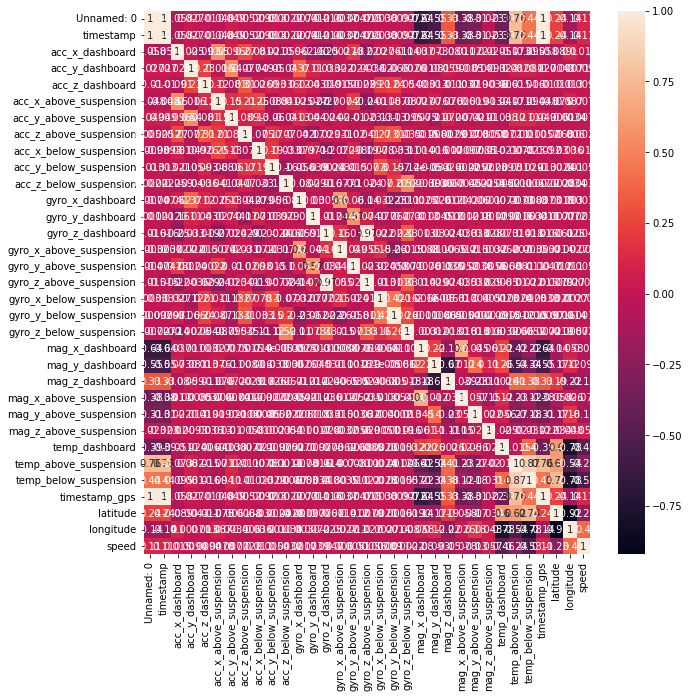

In [16]:
# Adjusting figure size through custom parameters
plt.rcParams['figure.figsize'] = [10, 10]

#ploting the heatmap for correlation
corr = Data.corr()
sns.heatmap(corr, annot=True)

##### Remove one of two features that have a correlation higher than 0.9

In [17]:
delL = []
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.5:
            delL.append(j)

####
delL = list(set(delL))
Data.drop(Data.columns[delL], axis = 1, inplace = True)

In [18]:
Data

,Unnamed: 0,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,acc_z_above_suspension,acc_x_below_suspension,acc_y_below_suspension,acc_z_below_suspension,gyro_x_dashboard,gyro_y_dashboard,...,gyro_y_below_suspension,mag_x_dashboard,mag_y_dashboard,mag_z_dashboard,mag_y_above_suspension,mag_z_above_suspension,temp_dashboard,longitude,speed,RoadType
0,0,0.365116,0.167893,9.793961,9.781861,0.024797,0.172611,9.793824,-0.133896,-0.018883,...,0.167302,22.878922,-6.040509,1.767874,-7.537556,-0.334800,35.065355,-51.098865,0.009128,0
1,1,0.392649,0.176273,9.771216,9.699261,0.024797,0.194158,9.842905,-0.027084,-0.003624,...,0.304631,22.878922,-5.854647,2.089306,-6.469241,-5.222873,34.993471,-51.098865,0.009128,0
2,2,0.409408,0.181062,9.732909,9.807000,0.003249,0.227677,9.888395,0.125504,-0.186729,...,-0.122615,23.434686,-4.181891,0.642863,-7.893661,-4.687194,34.993471,-51.098865,0.009128,0
3,3,0.371101,0.164302,9.749668,9.739963,0.005643,0.172611,9.871635,-0.088120,-0.034142,...,-0.183650,23.990449,-5.482924,1.125011,-7.893661,-4.687194,34.969509,-51.098865,0.009128,0
4,4,0.390255,0.159514,9.869378,9.762708,0.005643,0.200144,9.860862,-0.179672,0.118446,...,-0.046321,22.693668,-6.040509,1.928590,-8.012363,-4.084555,34.945548,-51.098865,0.009128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144031,144031,-0.527921,-0.322918,9.583271,9.528076,-0.704237,-0.054839,9.753122,-0.332260,-0.095177,...,-0.031063,-9.911112,-24.626692,3.375032,-42.673250,-16.673019,33.699554,-51.099070,0.005715,0
144032,144032,-0.663194,-0.575506,9.433633,10.223591,-0.748530,-0.212856,9.526870,-0.240707,-0.308800,...,-0.000545,-9.170094,-23.883244,4.178611,-42.554548,-20.489734,33.699554,-51.099070,0.005715,0
144033,144033,-0.375890,-0.245106,9.957964,9.687290,-0.719800,-0.150607,9.933885,0.064468,-0.156212,...,0.060490,-9.170094,-23.883244,4.178611,-39.705708,-18.347017,33.555785,-51.099070,0.005715,0
144034,144034,-0.385466,-0.091877,9.840648,8.940299,-0.705434,-0.378056,10.003317,-0.423813,0.820351,...,0.640324,-7.688059,-23.139797,5.785769,-39.705708,-17.007819,33.699554,-51.099070,0.005715,0


---

# 3. Build predictive model

#### Distributing Data into Train and test sets

In [19]:
# X = To be trained dataset
X = Data.iloc[:, 1:-1].values

# Y = Target to be tested dataset = Class/ASD
y = Data.iloc[:, -1].values

print(X[1], y[1])

[ 3.92649072e-01  1.76273097e-01  9.77121582e+00  9.69926130e+00
  2.47970886e-02  1.94158354e-01  9.84290505e+00 -2.70843506e-02
 -3.62396240e-03  7.62939453e-04  1.92551386e-02  3.04630824e-01
  2.28789223e+01 -5.85464744e+00  2.08930556e+00 -6.46924094e+00
 -5.22287342e+00  3.49934705e+01 -5.10988653e+01  9.12774100e-03] 0


#### Data Transformation - Min Max Normalization

In [20]:
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [21]:
# Data splitting
#       - Training : Test = 70 : 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

## Naïve Bayes

In [22]:
modelValues(GaussianNB(), "Naïve Bayes", X_train, y_train)

Predicting one record to check the Naïve Bayes model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 86.369%
Test -> 86.547%
K-Fold Cross Validation -> 86.357%

******************************

[[16661   194    86]
 [  298  5193  2337]
 [  227  2671 15544]]


## Logistic Regression

#### Regression should not be used since it is used for continuos data and data selected here is discrete
#### But it can still be used in exceptional cases, below is result of Logistic regression model

In [23]:
modelValues(LogisticRegression(), "Logistic Regression", X_train, y_train)

Predicting one record to check the Logistic Regression model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 88.064%
Test -> 88.327%
K-Fold Cross Validation -> 88.008%

******************************

[[16884    56     1]
 [   18  4771  3039]
 [   33  1897 16512]]


## Decision tree

In [24]:
# Classifier value by default is set to DecisionTreeClassifier()
# ------ So no need to give value in below code line
modelValues(model_name = "Decision Tree", X = X_train, y = y_train)

Predicting one record to check the Decision Tree model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 100.000%
Test -> 99.866%
K-Fold Cross Validation -> 99.844%

******************************

[[16938     2     1]
 [    6  7801    21]
 [    4    24 18414]]


## SVC

In [25]:
modelValues(SVC(), "Support Vector Classifier", X_train, y_train)

Predicting one record to check the Support Vector Classifier model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 98.396%
Test -> 98.343%
K-Fold Cross Validation -> 98.265%

******************************

[[16921    14     6]
 [    1  7319   508]
 [    3   184 18255]]


In [26]:
# Best model based on test data
bestBaseModel = max(test_percent, key = test_percent.get)
print(bestBaseModel)

Decision Tree


In [27]:
# bestBaseModel?

---

# 4. Build enhanced model for improving performance
#### Boosting/Boosting variants/Bagging/Random Forest/regression variants

## Random Forest

In [28]:
modelValues(RandomForestClassifier(n_estimators = 50, bootstrap = False, max_depth = 10, 
            random_state = 50), "Random Forest", X_train, y_train, 'boost')

Predicting one record to check the Random Forest model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 99.228%
Test -> 99.107%
K-Fold Cross Validation -> 99.106%

******************************

[[16941     0     0]
 [    0  7456   372]
 [    4    10 18428]]


## XG Boost

In [29]:
modelValues(XGBClassifier(n_estimators = 50, random_state = 50, learning_rate = 0.01, max_depth = 10,
                          verbosity = 0), "XG Boost", X_train, y_train, 'boost')

Predicting one record to check the XG Boost model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 99.748%
Test -> 99.681%
K-Fold Cross Validation -> 99.697%

******************************

[[16940     0     1]
 [    2  7715   111]
 [    4    20 18418]]


## Gradient Boosting

In [30]:
modelValues(GradientBoostingClassifier(n_estimators = 50, random_state = 50, learning_rate = 0.01, max_depth = 10),
            "Gradient Boosting", X_train, y_train, 'boost')

Predicting one record to check the Gradient Boosting model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 99.583%
Test -> 99.495%
K-Fold Cross Validation -> 99.536%

******************************

[[16938     1     2]
 [    1  7625   202]
 [    4     8 18430]]


## ADA Boost

In [31]:
modelValues(AdaBoostClassifier(base_estimator = baseModels[bestBaseModel], n_estimators = 50, random_state = 50,
                               learning_rate = 0.01, algorithm = 'SAMME'),
            "AdaBoost", X_train, y_train, 'boost')

Predicting one record to check the AdaBoost model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 100.000%
Test -> 99.859%
K-Fold Cross Validation -> 99.843%

******************************

[[16935     5     1]
 [    6  7798    24]
 [    3    22 18417]]


## Bagging Classifier

In [32]:
modelValues(BaggingClassifier(base_estimator = baseModels[bestBaseModel], n_estimators = 50, random_state = 50), 
            "Bagging", X_train, y_train, 'boost')

Predicting one record to check the Bagging model
Desired Prediction = 0, Actual Prediction = [0]
Train -> 99.999%
Test -> 99.894%
K-Fold Cross Validation -> 99.893%

******************************

[[16941     0     0]
 [    4  7805    19]
 [    4    19 18419]]


In [33]:
# Best model based on test data
bestBoostModel = max(test_percent2, key = test_percent2.get)
print(bestBoostModel)

Bagging


In [34]:
# bestBoostModel?

---

# 5. Explanation of model selection and performance
#### Allowed to try multiple models for the same

In [35]:
test_percent

{'Naïve Bayes': 86.547,
 'Logistic Regression': 88.327,
 'Decision Tree': 99.866,
 'Support Vector Classifier': 98.343}

In [36]:
test_percent2

{'Random Forest': 99.107,
 'XG Boost': 99.681,
 'Gradient Boosting': 99.495,
 'AdaBoost': 99.859,
 'Bagging': 99.894}

In [37]:
k_fold_percent

{'Naïve Bayes': 86.357,
 'Logistic Regression': 88.008,
 'Decision Tree': 99.844,
 'Support Vector Classifier': 98.265,
 'Random Forest': 99.106,
 'XG Boost': 99.697,
 'Gradient Boosting': 99.536,
 'AdaBoost': 99.843,
 'Bagging': 99.893}

In [38]:
TrainDF = copyDF(train_percent, train_percent2, 'Training Data Accuracy (%)')
TestDF = copyDF(test_percent, test_percent2, 'Test Data Accuracy (%)')

DF = pd.merge(TrainDF, TestDF, on = "Model")

for i in DF.Model:
    if i in list(train_percent.keys()):
        ModelType.append('Base')
    else: ModelType.append('Boost')

DF['K-Fold CV (%)'] = list(k_fold_percent.values())
DF['Model Type'] = ModelType
ModelType = list()

In [39]:
import seaborn as sns

cm = sns.light_palette("Black", as_cmap = True)

DF.style.background_gradient(cmap = cm).set_precision(2).highlight_min(axis = 0, color = 'Red').highlight_max(axis = 0, color='Blue')

,Model,Training Data Accuracy (%),Test Data Accuracy (%),K-Fold CV (%),Model Type
0,Naïve Bayes,86.37,86.55,86.36,Base
1,Logistic Regression,88.06,88.33,88.01,Base
2,Decision Tree,100.00,99.87,99.84,Base
3,Support Vector Classifier,98.40,98.34,98.27,Base
4,Random Forest,99.23,99.11,99.11,Boost
5,XG Boost,99.75,99.68,99.70,Boost
6,Gradient Boosting,99.58,99.50,99.54,Boost
7,AdaBoost,100.00,99.86,99.84,Boost
8,Bagging,100.00,99.89,99.89,Boost


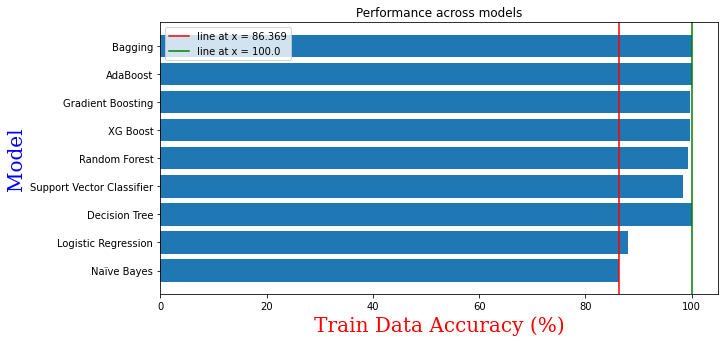

In [40]:
plt.rcParams['figure.figsize'] = [10, 5]

xcoords = [min(DF['Training Data Accuracy (%)']), max(DF['Training Data Accuracy (%)'])]
colors = ['r','g']

for xc, c in zip(xcoords, colors):
    plt.axvline(x = xc, label = 'line at x = {}'.format(xc), c = c)

font1 = {'family' : 'serif', 'color' : 'red', 'size' : 20}
font2 = {'family' : 'serif', 'color' : 'blue', 'size' : 20}

plt.barh(DF.Model, DF['Training Data Accuracy (%)'])
plt.xlabel('Train Data Accuracy (%)', fontdict = font1)
plt.ylabel('Model', fontdict = font2)
plt.title('Performance across models')
plt.legend()

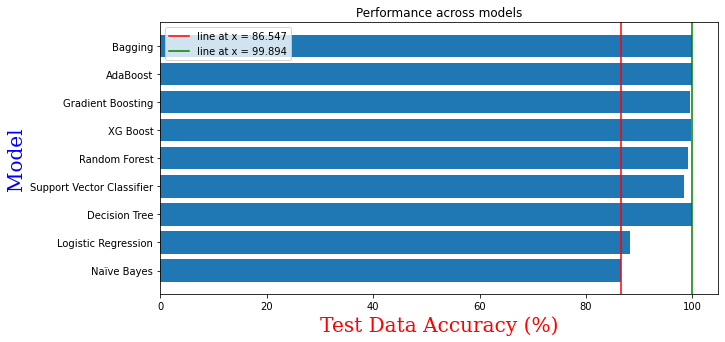

In [41]:
plt.rcParams['figure.figsize'] = [10, 5]

xcoords = [min(DF['Test Data Accuracy (%)']), max(DF['Test Data Accuracy (%)'])]
colors = ['r','g']

for xc, c in zip(xcoords, colors):
    plt.axvline(x = xc, label = 'line at x = {}'.format(xc), c = c)

font1 = {'family' : 'serif', 'color' : 'red', 'size' : 20}
font2 = {'family' : 'serif', 'color' : 'blue', 'size' : 20}

plt.barh(DF.Model, DF['Test Data Accuracy (%)'])
plt.xlabel('Test Data Accuracy (%)', fontdict = font1)
plt.ylabel('Model', fontdict = font2)
plt.title('Performance across models')
plt.legend()

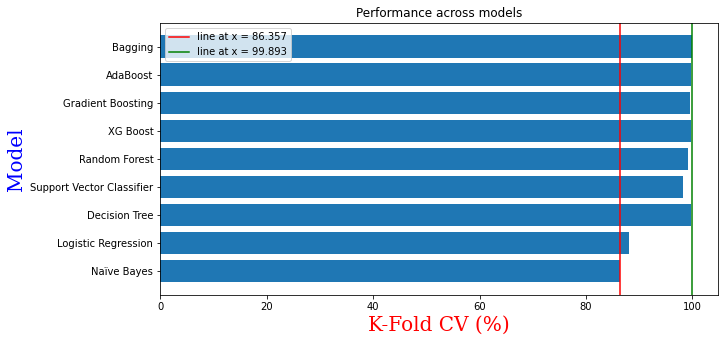

In [42]:
plt.rcParams['figure.figsize'] = [10, 5]

xcoords = [min(DF['K-Fold CV (%)']), max(DF['K-Fold CV (%)'])]
colors = ['r','g']

for xc, c in zip(xcoords, colors):
    plt.axvline(x = xc, label = 'line at x = {}'.format(xc), c = c)

font1 = {'family' : 'serif', 'color' : 'red', 'size' : 20}
font2 = {'family' : 'serif', 'color' : 'blue', 'size' : 20}

plt.barh(DF.Model, DF['K-Fold CV (%)'])
plt.xlabel('K-Fold CV (%)', fontdict = font1)
plt.ylabel('Model', fontdict = font2)
plt.title('Performance across models')
plt.legend()

---